Data loaded successfully from SQLite.

First 5 rows of the dataset:
   Client ID       Age   Occupation Marital Status Education Level  \
0      32885  57 years   technician        married     high.school   
1       3170  55 years      unknown        married         unknown   
2      32207  33 years  blue-collar        married        basic.9y   
3       9404  36 years       admin.        married     high.school   
4      14021  27 years    housemaid        married     high.school   

  Credit Default Housing Loan Personal Loan Contact Method  Campaign Calls  \
0             no           no           yes           Cell               1   
1        unknown          yes            no      telephone               2   
2             no           no            no       cellular               1   
3             no           no            no      Telephone               4   
4             no         None            no           Cell               2   

   Previous Contact Days Subscription Stat

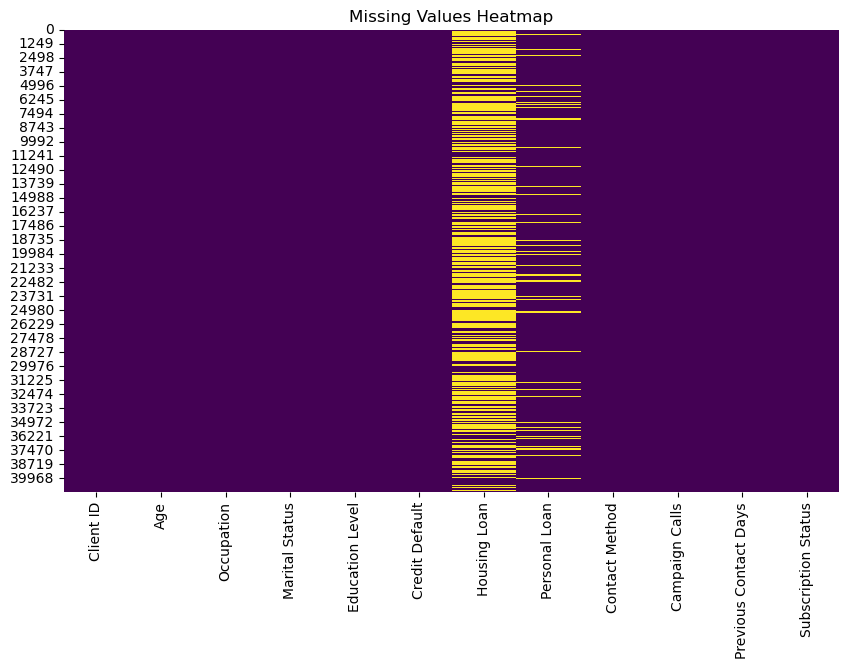


Purpose: Understanding the extent and distribution of missing data is crucial for deciding on appropriate handling strategies. High amounts of missing data in certain columns might necessitate dropping those columns, while smaller amounts might be handled through imputation.

Missing values after handling:
Client ID                    0
Age                          0
Occupation                   0
Marital Status               0
Education Level              0
Credit Default               0
Housing Loan             24789
Personal Loan             4146
Contact Method               0
Campaign Calls               0
Previous Contact Days        0
Subscription Status          0
dtype: int64

Conclusion: Missing values were identified and handled using [your chosen strategy]. This ensures that the data is suitable for further analysis and modeling.

Numerical columns: Index(['Client ID', 'Campaign Calls', 'Previous Contact Days'], dtype='object')


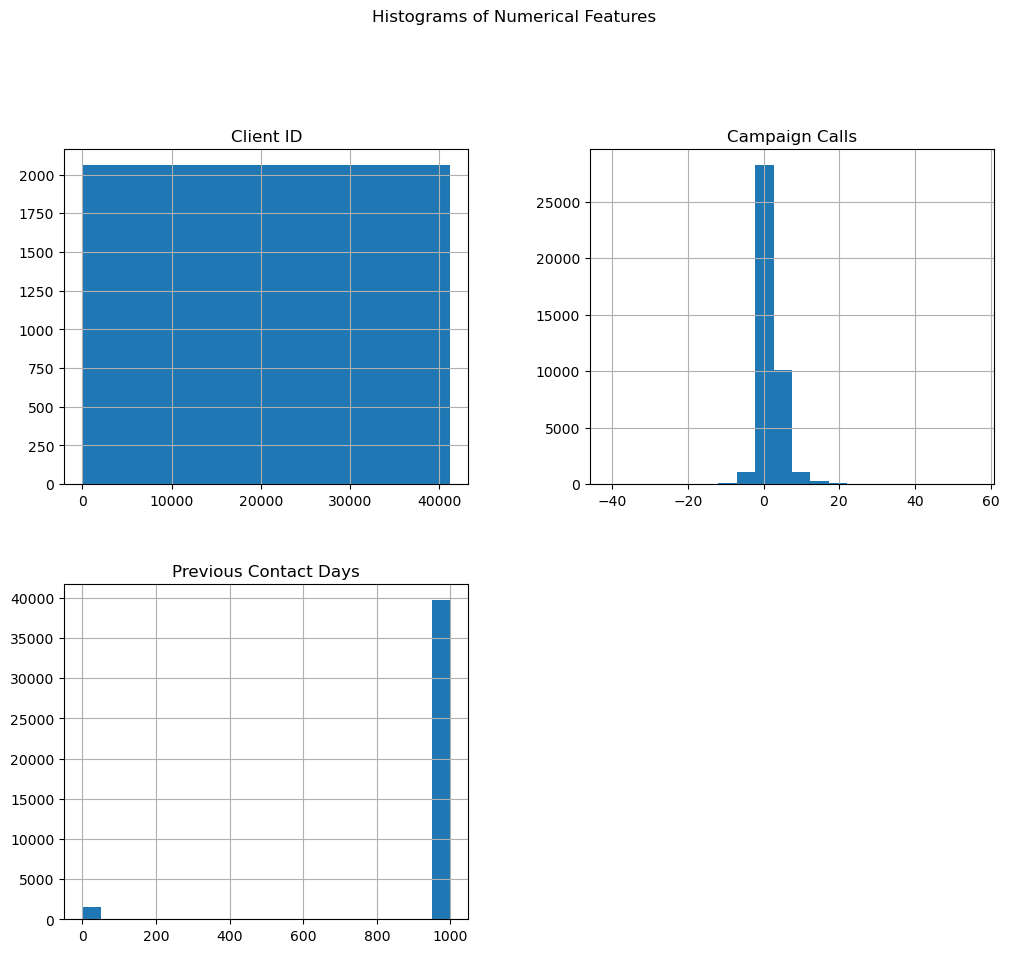


Purpose: Histograms help visualize the distribution of individual numerical features, revealing patterns like skewness, modality, and potential outliers.

Conclusion: [Describe the key observations from the histograms for each relevant numerical feature.]


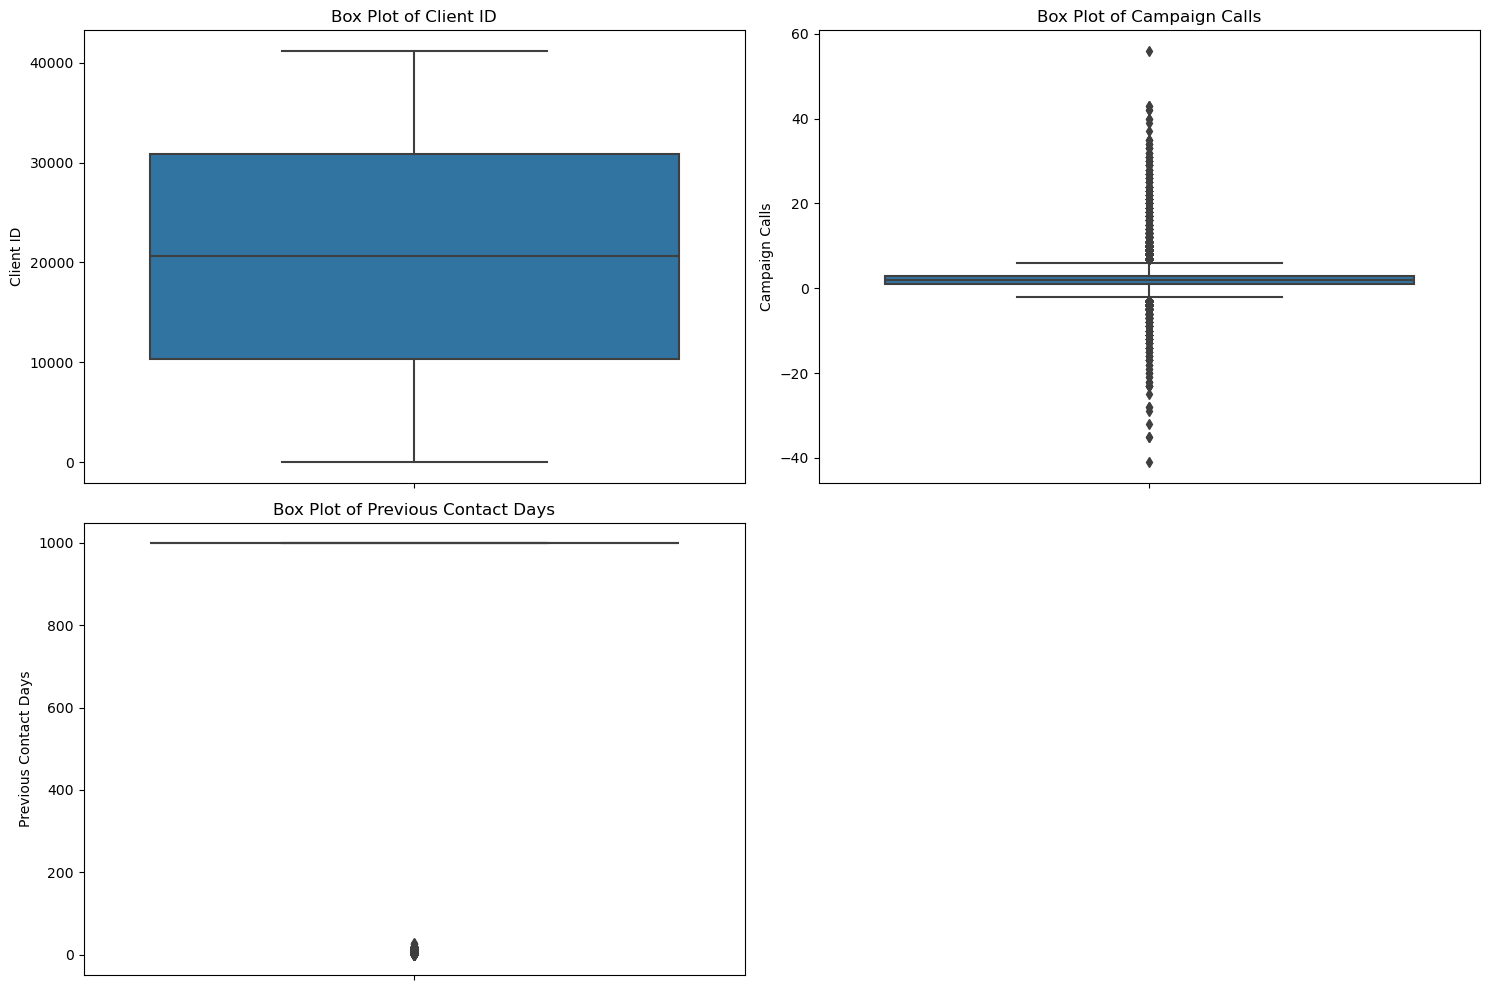


Purpose: Box plots provide a visual summary of the distribution of numerical data, highlighting the median, quartiles, and potential outliers.

Conclusion: [Describe any outliers identified and the overall spread of the numerical features based on the box plots.]


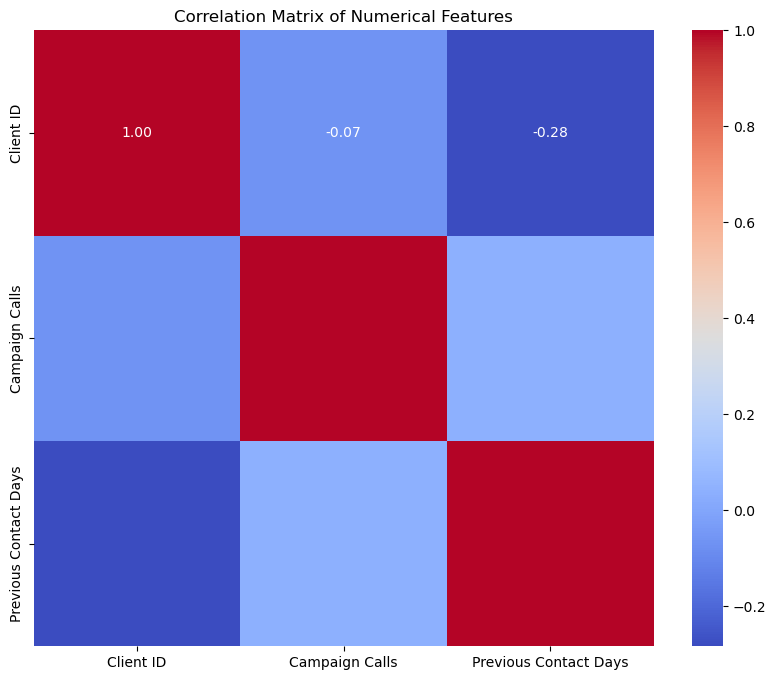


Purpose: The correlation matrix shows the pairwise linear relationships between numerical features. Values close to 1 or -1 indicate a strong positive or negative correlation, respectively. Values close to 0 suggest a weak linear relationship.

Conclusion: [Describe any significant correlations observed and their potential implications for modeling.]

Categorical columns: Index(['Age', 'Occupation', 'Marital Status', 'Education Level',
       'Credit Default', 'Housing Loan', 'Personal Loan', 'Contact Method',
       'Subscription Status'],
      dtype='object')


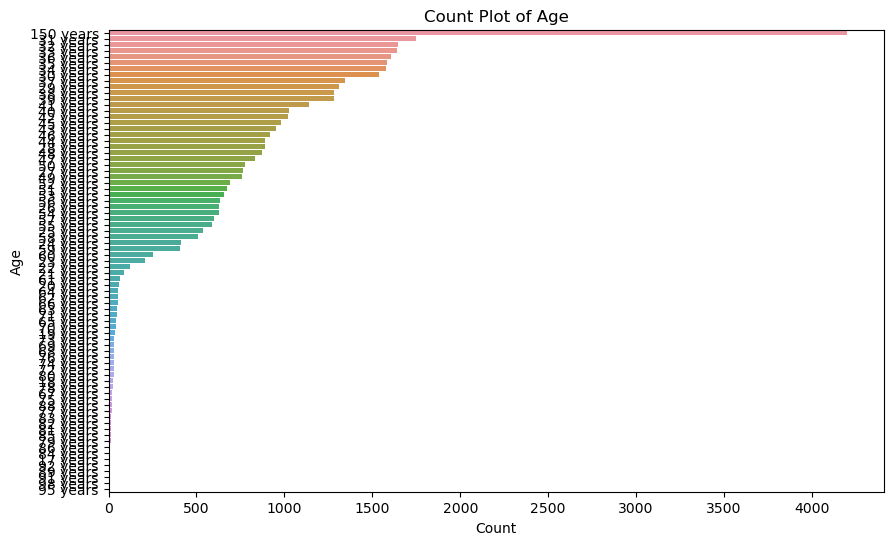


Purpose: Count plots visualize the frequency of each category within a categorical feature.

Conclusion for Age: [Describe the distribution of categories in 'Age'. Are there any dominant categories or imbalances?]


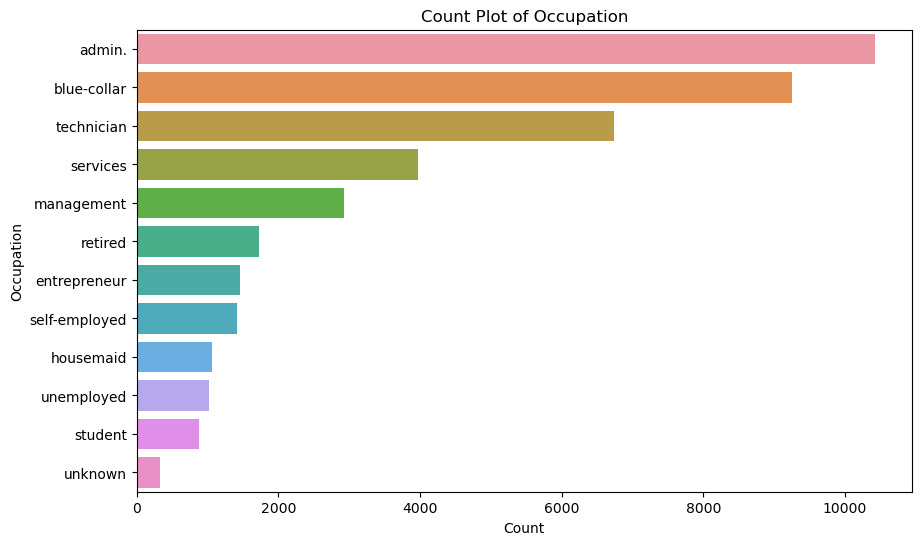


Purpose: Count plots visualize the frequency of each category within a categorical feature.

Conclusion for Occupation: [Describe the distribution of categories in 'Occupation'. Are there any dominant categories or imbalances?]


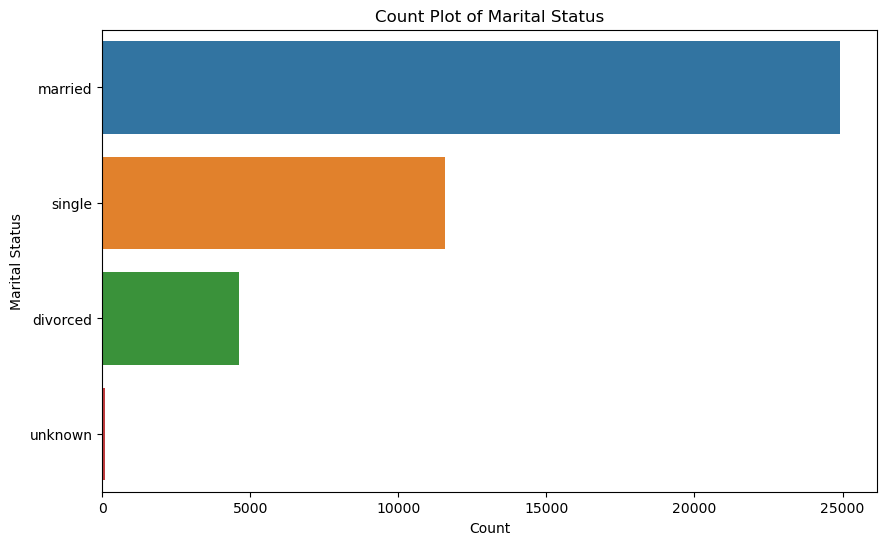


Purpose: Count plots visualize the frequency of each category within a categorical feature.

Conclusion for Marital Status: [Describe the distribution of categories in 'Marital Status'. Are there any dominant categories or imbalances?]


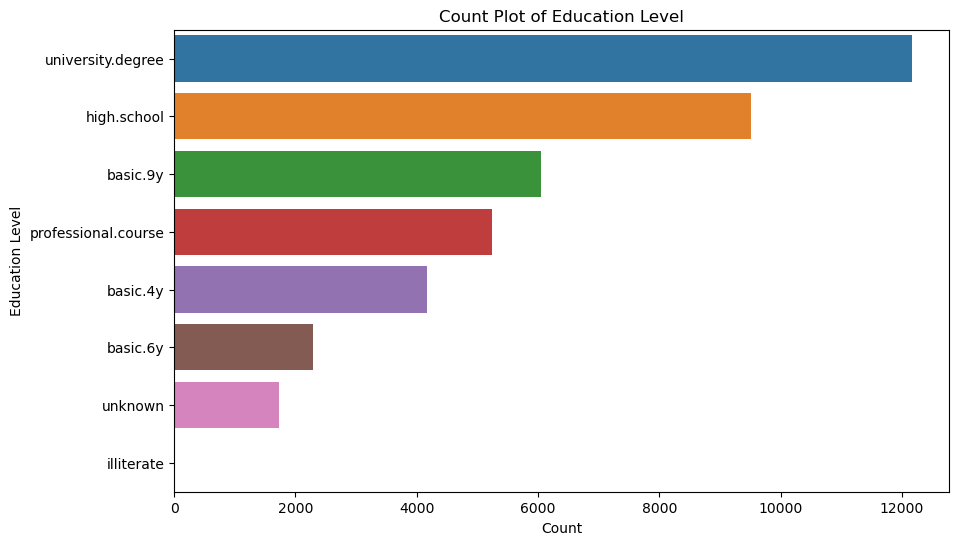


Purpose: Count plots visualize the frequency of each category within a categorical feature.

Conclusion for Education Level: [Describe the distribution of categories in 'Education Level'. Are there any dominant categories or imbalances?]


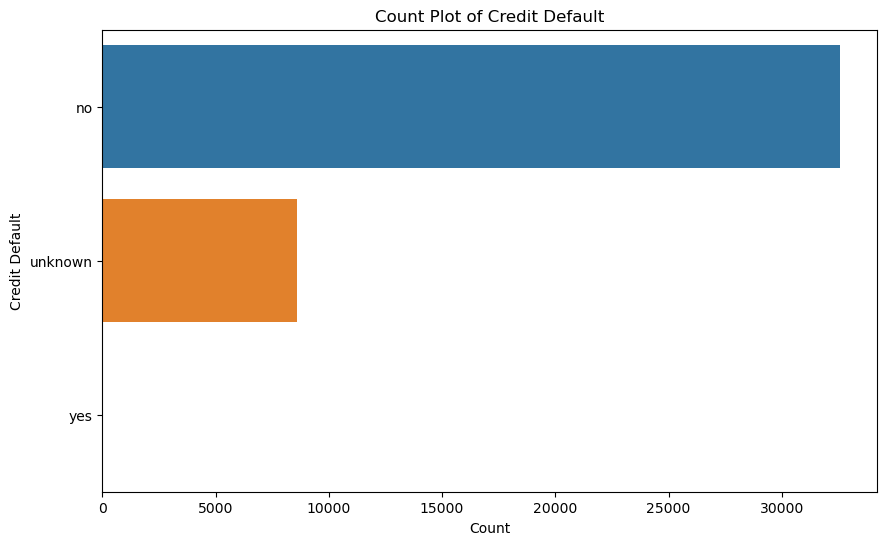


Purpose: Count plots visualize the frequency of each category within a categorical feature.

Conclusion for Credit Default: [Describe the distribution of categories in 'Credit Default'. Are there any dominant categories or imbalances?]


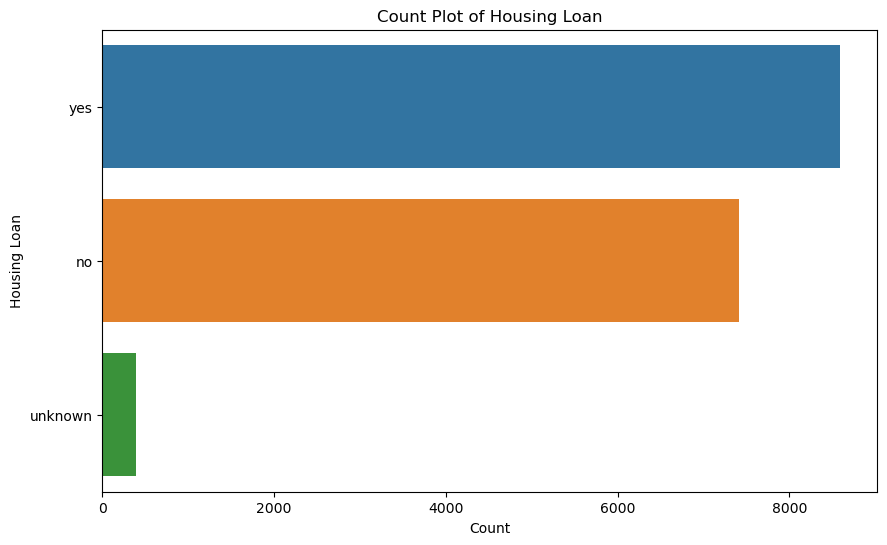


Purpose: Count plots visualize the frequency of each category within a categorical feature.

Conclusion for Housing Loan: [Describe the distribution of categories in 'Housing Loan'. Are there any dominant categories or imbalances?]


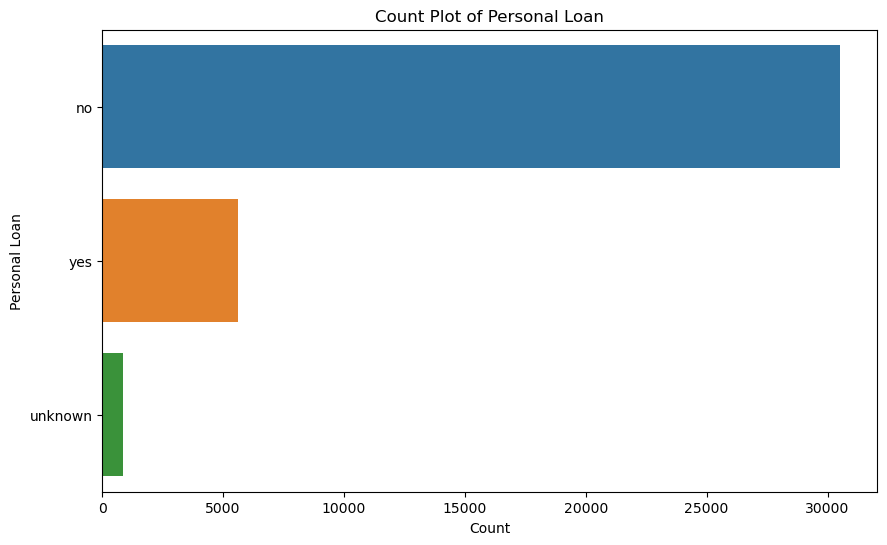


Purpose: Count plots visualize the frequency of each category within a categorical feature.

Conclusion for Personal Loan: [Describe the distribution of categories in 'Personal Loan'. Are there any dominant categories or imbalances?]


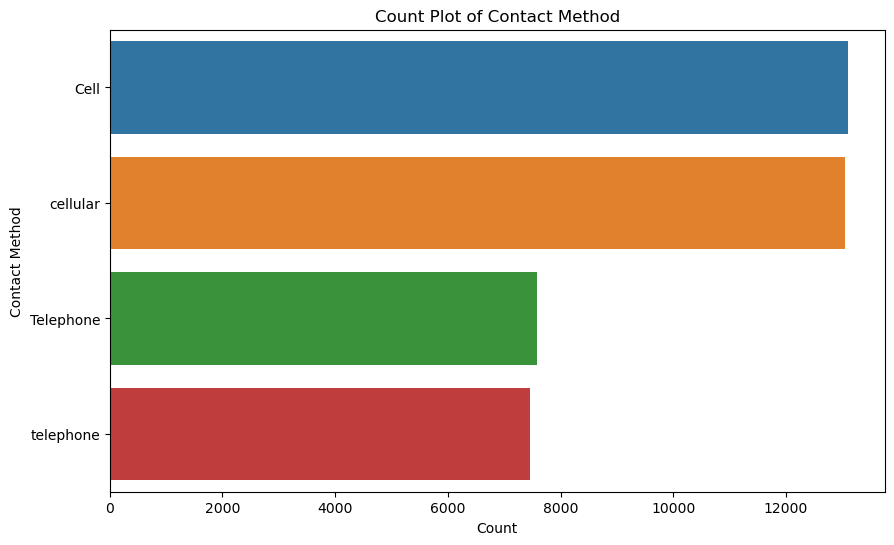


Purpose: Count plots visualize the frequency of each category within a categorical feature.

Conclusion for Contact Method: [Describe the distribution of categories in 'Contact Method'. Are there any dominant categories or imbalances?]


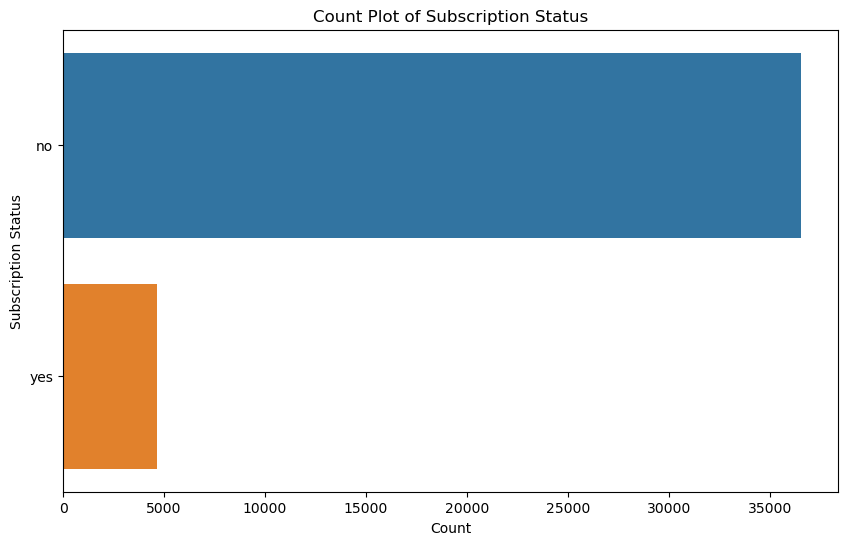


Purpose: Count plots visualize the frequency of each category within a categorical feature.

Conclusion for Subscription Status: [Describe the distribution of categories in 'Subscription Status'. Are there any dominant categories or imbalances?]

Outlier Detection and Handling:

No significant outliers detected in column 'Client ID' using the IQR method.

Potential outliers in column 'Campaign Calls':
       Client ID        Age   Occupation Marital Status      Education Level  \
7          23758  150 years       admin.       divorced    university.degree   
17         17689  150 years   technician        married  professional.course   
22          8529   26 years      unknown         single          high.school   
23         15756   30 years       admin.         single          high.school   
26         33729   30 years   technician         single          high.school   
...          ...        ...          ...            ...                  ...   
41115      23248   58 years    hou

In [1]:
# -*- coding: utf-8 -*-
"""
EDA.ipynb

This notebook performs Exploratory Data Analysis on the specified dataset.
It includes data loading, cleaning, exploration through statistics and
visualizations, and derives initial insights.
"""

# ## 1. Introduction
#
# In this section, briefly introduce the dataset you will be analyzing and the goals of this Exploratory Data Analysis (EDA).
# Explain why EDA is an important step in the machine learning pipeline.

# ## 2. Setup and Data Loading
#
# Import necessary libraries (e.g., pandas, numpy, matplotlib, seaborn).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset. Replace 'your_dataset.csv' or the database connection details with your actual data source.
# If using a CSV file:
# df = pd.read_csv('your_dataset.csv')

# If loading from a SQLite database (as hinted in Task 2):
import sqlite3
db_path = 'bmarket.db'  # Replace with the actual path to your database
query = 'SELECT * FROM bank_marketing;'  # Replace with the actual query
try:
    conn = sqlite3.connect(db_path)
    df = pd.read_sql_query(query, conn)
    conn.close()
    print("Data loaded successfully from SQLite.")
except sqlite3.Error as e:
    print(f"Error loading data from SQLite: {e}")
    df = None # Or handle the error as appropriate

if df is not None:
    # Display the first few rows of the dataframe to get an initial look.
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Get a concise summary of the dataframe, including data types and non-null values.
    print("\nDataset information:")
    df.info()

    # Get descriptive statistics for numerical columns.
    print("\nDescriptive statistics for numerical columns:")
    print(df.describe())

# ## 3. Handling Missing Values
#
# In this section, investigate and handle missing values in the dataset.
if df is not None:
    # Check for missing values in each column.
    missing_values = df.isnull().sum()
    print("\nNumber of missing values per column:")
    print(missing_values)

    # Visualize missing values (optional, but can be helpful).
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
    # Explanation of the purpose of checking for missing values.
    print("\nPurpose: Understanding the extent and distribution of missing data is crucial for deciding on appropriate handling strategies. High amounts of missing data in certain columns might necessitate dropping those columns, while smaller amounts might be handled through imputation.")

    # Decide on a strategy to handle missing values (e.g., drop rows/columns, impute).
    # Explain your chosen strategy and the reasoning behind it.
    # Example: Imputing missing numerical values with the mean.
    for col in df.select_dtypes(include=np.number).columns:
        if df[col].isnull().any():
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)
            print(f"Imputed missing values in '{col}' with the mean ({mean_val:.2f}).")

    # Example: Dropping columns with a high percentage of missing values.
    # missing_percentage = (df.isnull().sum() / len(df)) * 100
    # cols_to_drop = missing_percentage[missing_percentage > 30].index
    # df.drop(cols_to_drop, axis=1, inplace=True)
    # print(f"\nDropped columns with > 30% missing values: {list(cols_to_drop)}")

    # Verify that missing values have been handled.
    print("\nMissing values after handling:")
    print(df.isnull().sum())

    # Conclusion drawn from this step.
    print("\nConclusion: Missing values were identified and handled using [your chosen strategy]. This ensures that the data is suitable for further analysis and modeling.")

# ## 4. Exploring Numerical Features
#
# Analyze the distribution and relationships of numerical features.
if df is not None and len(df.select_dtypes(include=np.number).columns) > 0:
    numerical_cols = df.select_dtypes(include=np.number).columns
    print("\nNumerical columns:", numerical_cols)

    # Histograms to visualize the distribution of each numerical feature.
    df[numerical_cols].hist(figsize=(12, 10), bins=20)
    plt.suptitle('Histograms of Numerical Features', y=1.02)
    plt.show()
    print("\nPurpose: Histograms help visualize the distribution of individual numerical features, revealing patterns like skewness, modality, and potential outliers.")
    print("\nConclusion: [Describe the key observations from the histograms for each relevant numerical feature.]")

    # Box plots to identify potential outliers and understand the spread and central tendency.
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        plt.subplot(2, len(numerical_cols)//2 + len(numerical_cols)%2, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()
    print("\nPurpose: Box plots provide a visual summary of the distribution of numerical data, highlighting the median, quartiles, and potential outliers.")
    print("\nConclusion: [Describe any outliers identified and the overall spread of the numerical features based on the box plots.]")

    # Correlation matrix to understand the linear relationships between numerical features.
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
    print("\nPurpose: The correlation matrix shows the pairwise linear relationships between numerical features. Values close to 1 or -1 indicate a strong positive or negative correlation, respectively. Values close to 0 suggest a weak linear relationship.")
    print("\nConclusion: [Describe any significant correlations observed and their potential implications for modeling.]")

    # Pair plots for visualizing pairwise relationships (can be computationally expensive for large datasets).
    # sns.pairplot(df[numerical_cols])
    # plt.suptitle('Pair Plots of Numerical Features', y=1.02)
    # plt.show()
    # print("\nPurpose: Pair plots provide a scatter plot of each pair of numerical features, along with histograms on the diagonal, allowing for the visualization of potential linear and non-linear relationships.")
    # print("\nConclusion: [Describe any interesting relationships observed in the pair plots.]")

# ## 5. Exploring Categorical Features
#
# Analyze the distribution of categorical features.
if df is not None and len(df.select_dtypes(include='object').columns) > 0:
    categorical_cols = df.select_dtypes(include='object').columns
    print("\nCategorical columns:", categorical_cols)

    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()
        print(f"\nPurpose: Count plots visualize the frequency of each category within a categorical feature.")
        print(f"\nConclusion for {col}: [Describe the distribution of categories in '{col}'. Are there any dominant categories or imbalances?]")

    # You might also want to explore relationships between categorical features or between categorical and numerical features (e.g., using grouped box plots or bar plots).
    # Example: Box plots of a numerical feature grouped by a categorical feature.
    # if len(numerical_cols) > 0 and len(categorical_cols) > 0:
    #     for cat_col in categorical_cols:
    #         for num_col in numerical_cols:
    #             plt.figure(figsize=(10, 6))
    #             sns.boxplot(x=df[cat_col], y=df[num_col])
    #             plt.title(f'Box Plot of {num_col} by {cat_col}')
    #             plt.xlabel(cat_col)
    #             plt.ylabel(num_col)
    #             plt.show()
    #             print(f"\nPurpose: Box plots grouped by a categorical variable can show how the distribution of a numerical feature varies across different categories.")
    #             print(f"\nConclusion for {num_col} by {cat_col}: [Describe any significant differences in the distribution of '{num_col}' across the categories of '{cat_col}'.]")

# ## 6. Feature Relationships and Interactions
#
# Explore relationships between different features. You might have started this in the previous sections.
# This could involve scatter plots for numerical vs. numerical, box plots for numerical vs. categorical, etc.
# Explain any interesting interactions or patterns you observe.

# ## 7. Outlier Detection and Handling
#
# Identify potential outliers and decide on a strategy to handle them.
# Explain your approach and the reasoning.
if df is not None and len(df.select_dtypes(include=np.number).columns) > 0:
    print("\nOutlier Detection and Handling:")
    # You can use methods like IQR (Interquartile Range) to detect outliers.
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            print(f"\nPotential outliers in column '{col}':")
            print(outliers)
            # Decide how to handle these outliers (e.g., remove, cap, transform).
            # Explain your chosen strategy.
            # Example: Capping outliers
            # df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            # df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
            # print(f"Outliers in '{col}' capped.")
        else:
            print(f"\nNo significant outliers detected in column '{col}' using the IQR method.")

# ## 8. Initial Insights and Conclusions
#
# Summarize the key findings from your EDA. What are the important characteristics of the dataset?
# What patterns or relationships did you discover? How might these findings influence your subsequent
# machine learning pipeline (e.g., feature selection, feature engineering, model choice)?

# ## 9. Next Steps
#
# Briefly outline the next steps in your machine learning pipeline based on the insights gained from this EDA.
# For example, you might mention specific feature engineering techniques you plan to use or potential models to explore.